<a href="https://colab.research.google.com/github/Nadish-Madadi/Tesla-Stock-Prediction-Model/blob/main/Tesla_Stock_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings('ignore')

'''
The below program determines the accuracy of a machine learning model to buy
TSLA stocks based on data from 2010-2020

Dataset: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020

'''


'\nThe below program determines the accuracy of a machine learning model to buy \nTSLA stocks based on data from 2010-2020\n\nDataset: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020\n\n'

In [101]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [102]:
df.shape

(2416, 7)

In [103]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


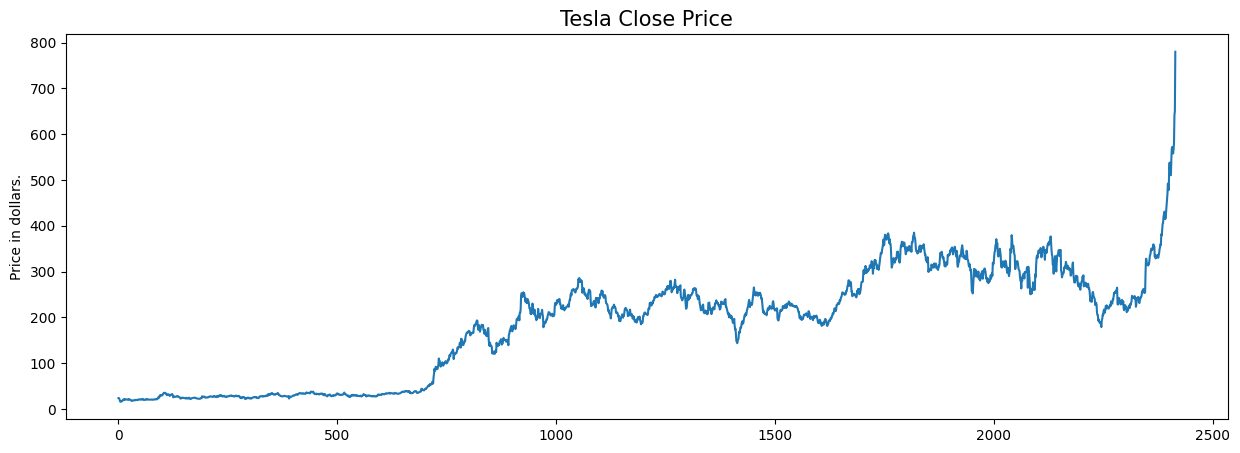

In [105]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close Price', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [106]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [107]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [108]:
df = df.drop(['Adj Close'], axis=1)

In [109]:
df.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [110]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

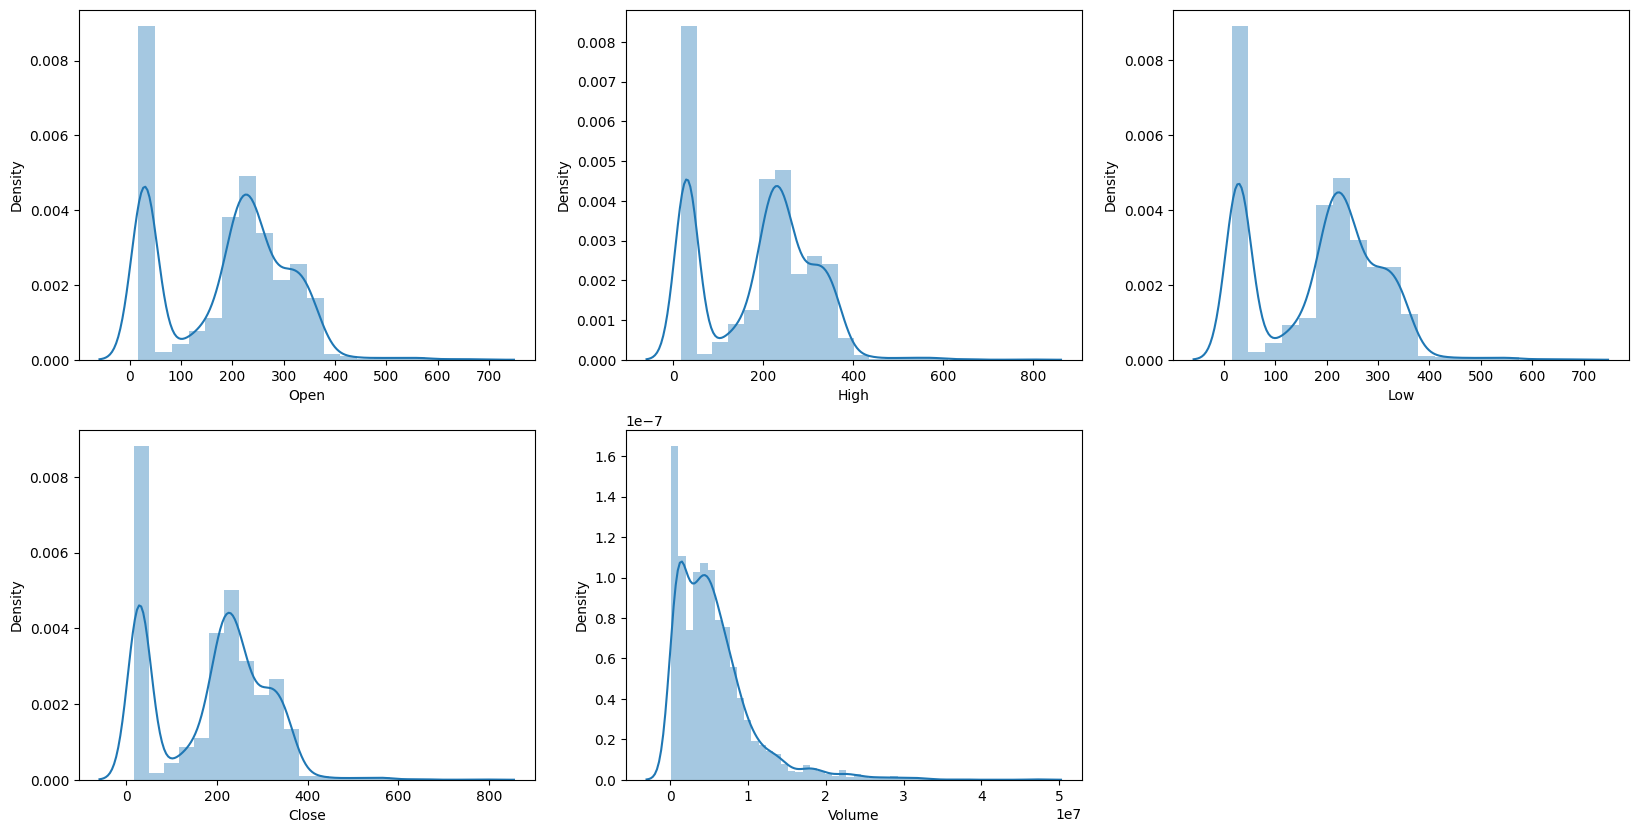

In [111]:
features = ["Open", "High", "Low", "Close", "Volume"]

plt.subplots(figsize = (20,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])

plt.show()

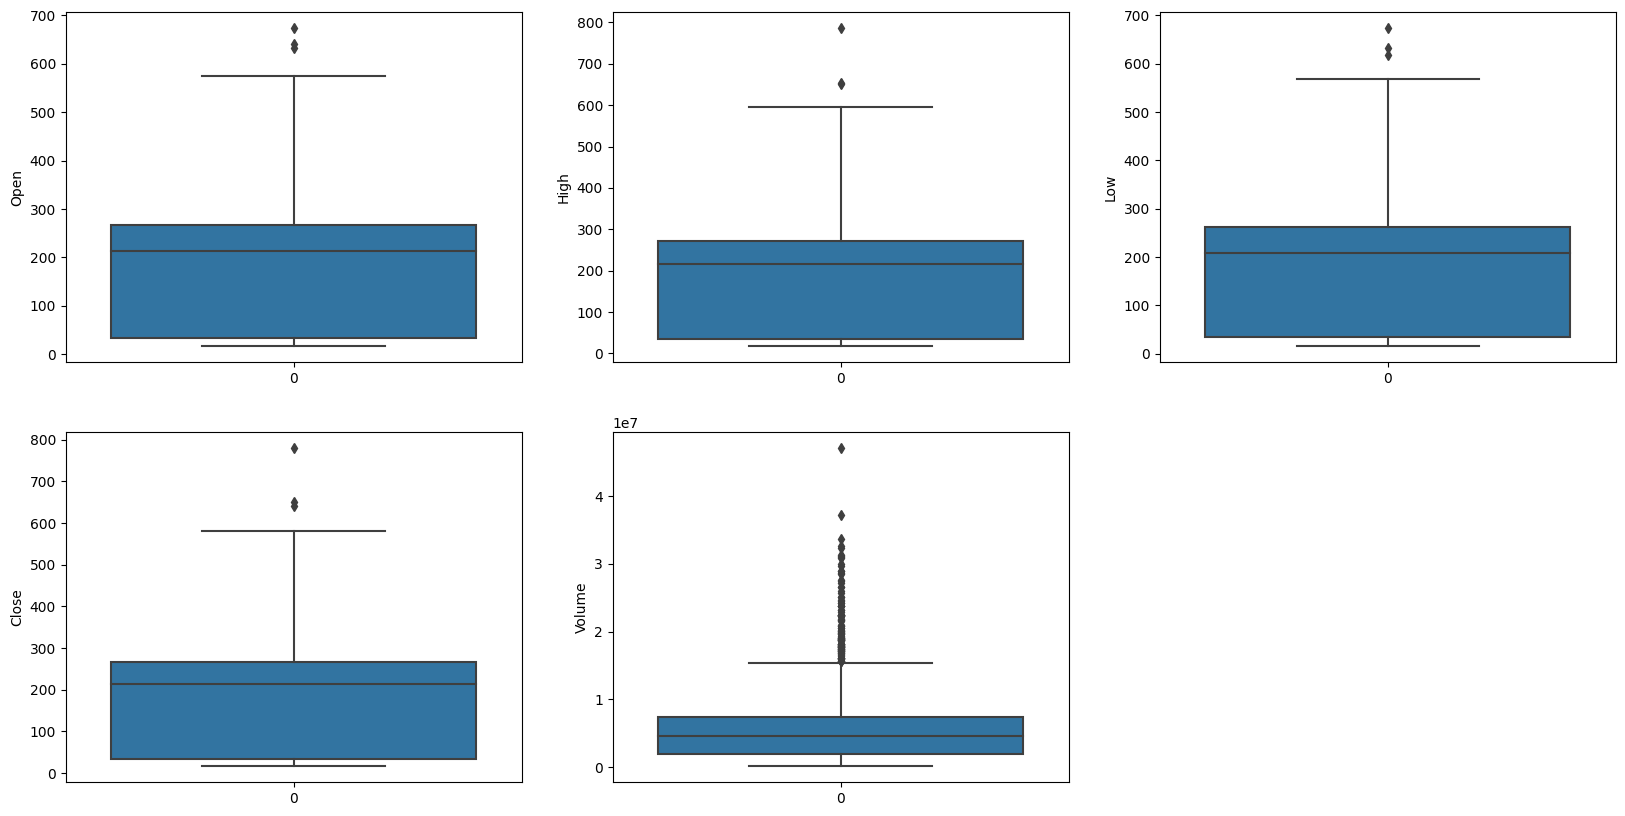

In [112]:
plt.subplots(figsize=(20,10))

for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
  plt.ylabel(col)
plt.show()

In [113]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [114]:
df['is_quarter_end'] = np.where(df['month']%3 == 0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


['Open', 'High', 'Low', 'Close']


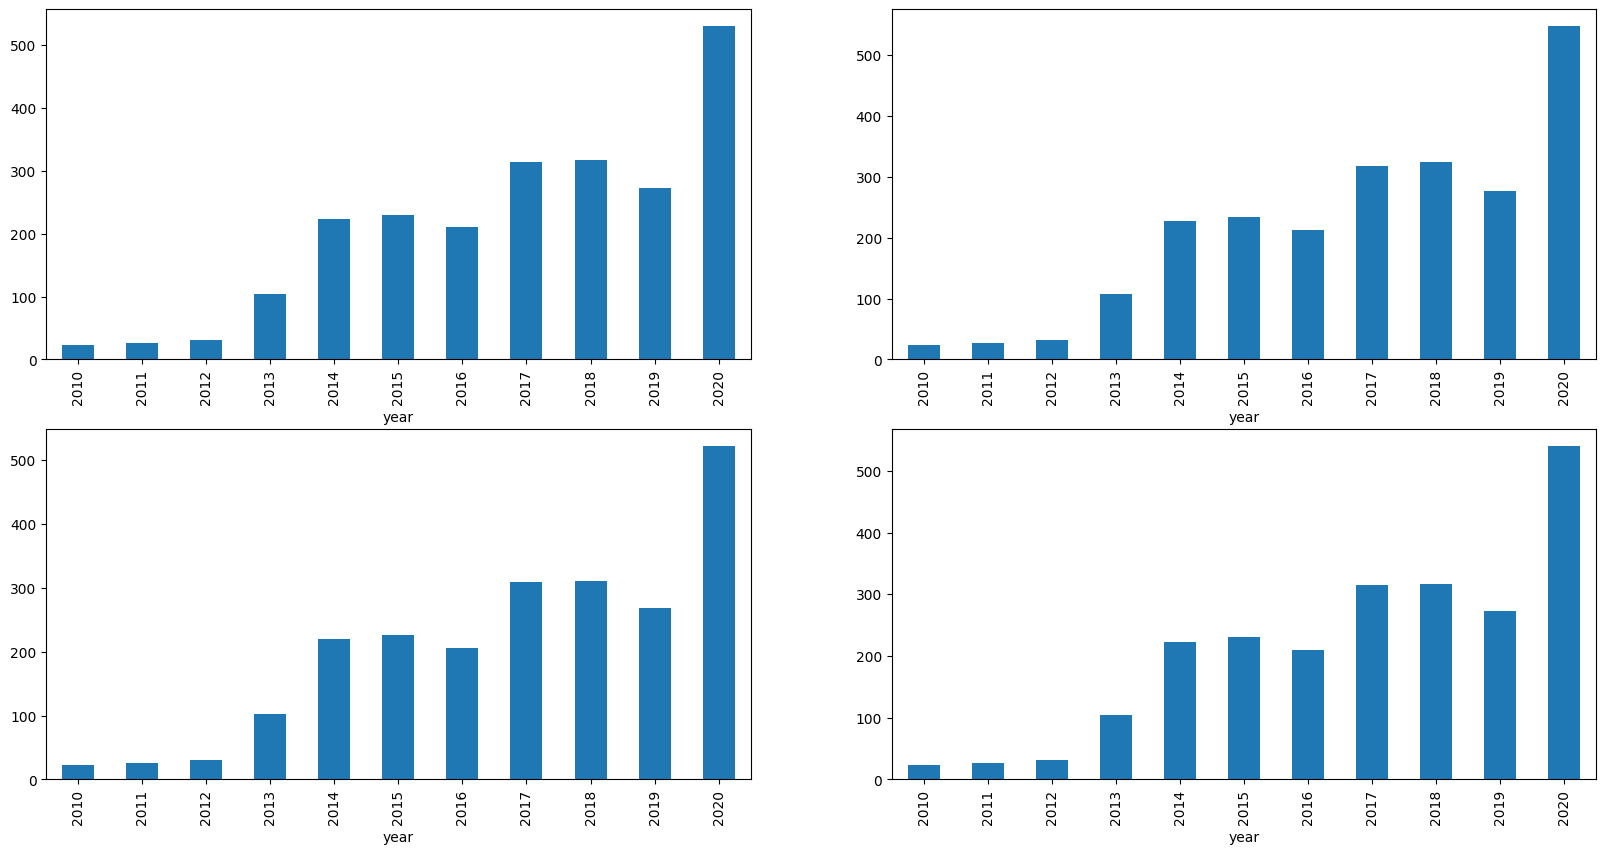

In [115]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

volume_excluded_features = [i for i in features if i != 'Volume']
print(volume_excluded_features)

for i,col in enumerate(volume_excluded_features):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()

plt.show()

In [116]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [117]:
# @markdown The above data shows:
# @markdown - higher prices at quarter end
# @markdown - lower volume of trades

In [118]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

df.head(15)

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,7,7,2010,0,0.600000,-1.649999,1
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,7711400,8,7,2010,0,-1.320000,-1.950000,0
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,4050600,9,7,2010,0,0.180000,-1.350001,0
8,7/12/2010,17.950001,18.070000,17.000000,17.049999,2202500,12,7,2010,0,0.900002,-1.070000,1
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,2680100,13,7,2010,0,-0.750000,-1.739999,1


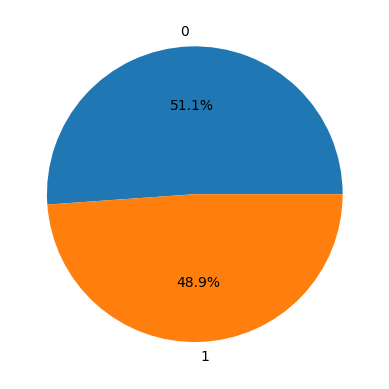

In [119]:
plt.pie(df['target'].value_counts().values, labels=[0,1], autopct='%1.1f%%')
plt.show()

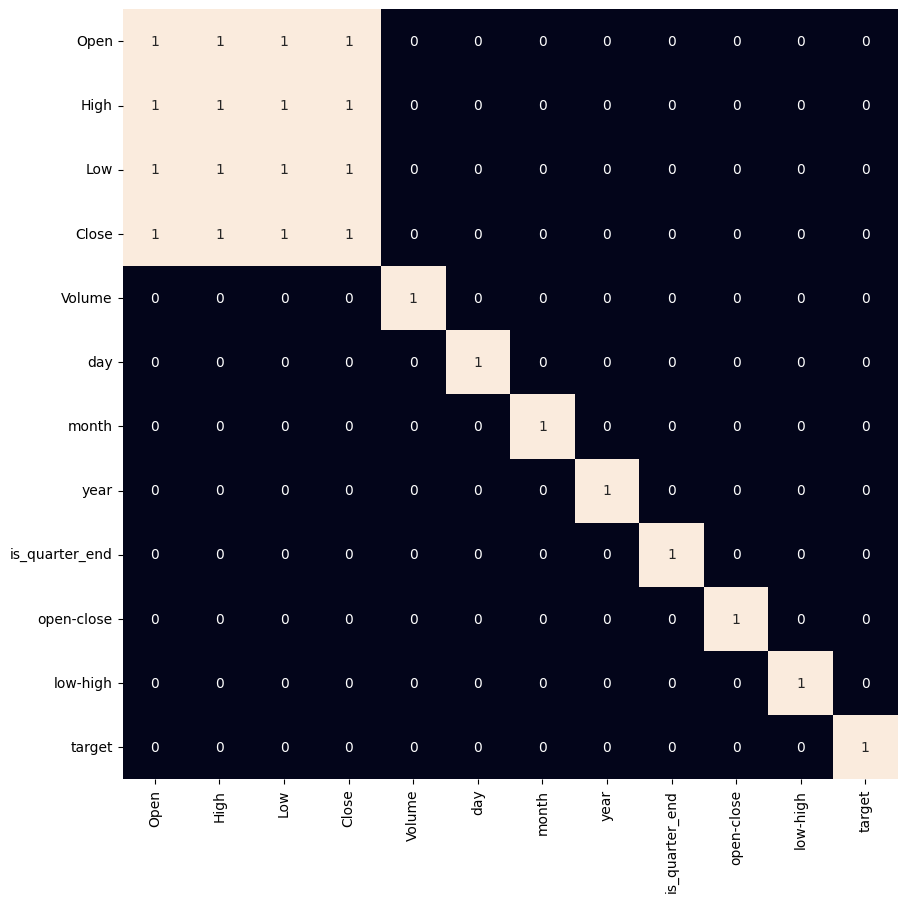

In [120]:
plt.figure(figsize=(10,10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [121]:
features = df[['open-close','low-high','is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features,target,test_size=0.05,random_state=2022)

print(X_train.shape, X_valid.shape)

(2295, 3) (121, 3)


In [122]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f"{models[i]}: ")

  print(f"Training Accuracy: {metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1])}")

  print(f"Validation Accuracy: {metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1])} \n")

LogisticRegression(): 
Training Accuracy: 0.5247065583189691
Validation Accuracy: 0.5002747252747253 

SVC(kernel='poly', probability=True): 
Training Accuracy: 0.5183665155757415
Validation Accuracy: 0.4583791208791209 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 
Training Accuracy: 0.957

In [123]:
models

[LogisticRegression(),
 SVC(kernel='poly', probability=True),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)]

In [124]:
# @markdown Support Vector Classifier has the highest validation accuracy

# @markdown XGBClassifier has high performance but it is prone to overfitting
# @markdown - large difference between training and validation accuracy

# @markdown This doesn't impact Linear Regression and SVC but SVC has a higher validation accuracy

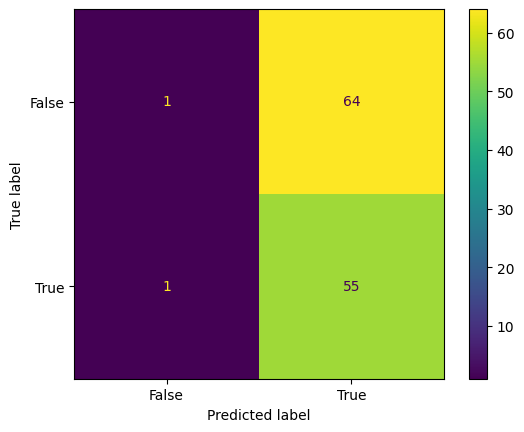

In [125]:
predictions = models[1].predict(X_valid)

confusion_matrix = metrics.confusion_matrix(Y_valid, predictions)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

disp.plot()
plt.show()